# Assigment 5
# Tracking of a moving object which trajectory is disturbed by random acceleration 

## Team 6: Berman Vladimir, Dronova Maria, Bazhenov Artem, Skoltech, October, 2022

### Initialisation of libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Setting functions

In [3]:
# generating velocity vi
def gnerate_vel_and_ac(exp, var, T, V0, numb):
    arr = np.zeros(numb)
    a = np.random.normal(exp, var ** 0.5, numb)
    arr[0] = V0
    for i in range(1, len(arr)):
        arr[i] = arr[i - 1] + a[i - 1] * T
    return arr, a

# generating coordinate xi 
def generate_x(T, X0, a, v):
    arr = np.zeros(len(a))
    arr[0] = X0
    for i in range(1, len(a)):
        arr[i] = arr[i - 1] + v[i - 1] * T + a[i - 1] * (T ** 2) / 2
    return arr

# Kalman filter
def kalman_filt(z, X0, P0, F, Q, R, H):
    arr = np.zeros([200, 2])
    P = np.zeros([200, 2 , 2])
    K = np.zeros([200, 2])
    arr[0] = X0
    P[0] = P0
    for i in range(1, len(X)):
        arr[i] = np.dot(F, arr[i - 1].reshape(2, 1)).reshape(1, 2)
        P[i] = np.dot(np.dot(F, P[i - 1]), F.transpose()) + Q

        K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)

        arr[i] = arr[i] + K[i] * (z[i] - np.dot(H, arr[i]))
        P[i] = (np.identity(2) - (K[i].reshape(2,1)).dot(H.reshape(1,2))).dot(P[i])
        
    return arr, P, K, P[len(P) - 1], K[len(K) - 1]

# extrapolation
def extrapol(x, m, F):
    arr = np.array(x)
    F_pow = np.linalg.matrix_power(F, m - 1)
    for i in range(len(x) - m + 1):
        arr[i + m - 1] = F_pow.dot(x[i])
    return arr

### 1. Generating a true trajectory Xi of an object motion disturbed by normally distributed random acceleration

In [4]:
x0 = 5
v0 = 1
T = 1
sigmaa_2 = 0.2 ** 2
numb = 200
v,a = gnerate_vel_and_ac(0, sigmaa_2 ** 0.5, T, v0, numb)
x = generate_x(T, x0, a, v)

### 2. Generating measurements zi of the coordinate xi 

In [5]:
sigmaeta_2 = 20 ** 2
eta = np.random.normal(0, sigmaeta_2 ** 0.5, 200)
z = x + eta

### 3. ConstructIing Kalman filter 

#### Setting transition matrix F, input matrix G, observation matix H

In [6]:
F = np.array([[1, T], [0, 1]])
G = np.array([T ** 2 / 2, T])
H = np.array([1, 0])

#### Generating state vector

In [7]:
X = np.zeros([200, 2])
X[0] = np.array([x[0], v[0]])
for i in range(1, len(X)):
    X[i] = np.dot(F, X[i - 1]) + np.dot(G, a[i - 1])

#### Generating measurements

In [8]:
for i in range(len(x)):
    z[i] = np.dot(H, X[i]) + eta[i]

#### 4. Developing Kalman filter algorithm

In [9]:
Q = np.dot(np.dot(G, G.transpose()), sigmaa_2) # covariance matrix Q of state noise Ga
R = sigmaeta_2 # covariance matrix R of measurements noise eta
X0 = np.array([2, 0]) # initial filtered estimate 
P0 = np.array([[10000, 0], [0, 10000]]) # initial filtration error covariance matrix 

X_filt, P, K = kalman_filt(z, X0, P0, F, Q, R, H)[:3] 

#### 5. Plotting results

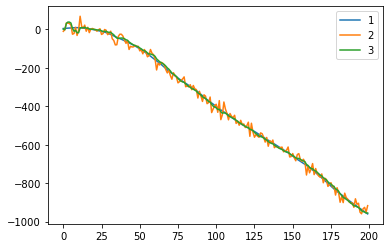

In [10]:
plt.plot(X[:,0])
plt.plot(z)
plt.plot(X_filt[:,0])
plt.legend(["1", "2", "3"])

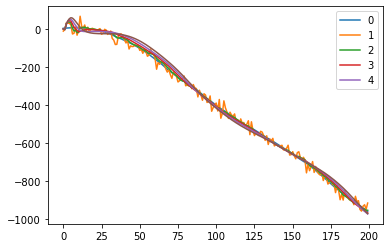

In [11]:
plt.plot(X[:, 0])
plt.plot(z)
plt.plot(X_filt[:,0])
plt.plot(kalman_filt(X_filt[:,0], X0, P0, F, Q, R, H)[0][:,0])
plt.plot(kalman_filt(kalman_filt(X_filt[:,0], X0, P0, F, Q, R, H)[0][:,0], X0, P0, F, Q, R, H)[0][:,0])
plt.plot(kalman_filt(kalman_filt(kalman_filt(X_filt[:,0], X0, P0, F, Q, R, H)[0][:,0], X0, P0, F, Q, R, H)[0][:,0], X0, P0, F, Q, R, H)[0][:,0])
plt.legend(["0", "1", "2", "3", "4"])

Gain stable =  0.13895150652807645
Standard deviation of estimation error stable =  7.455239943236608


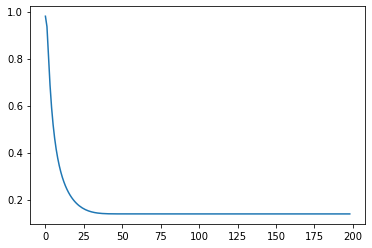

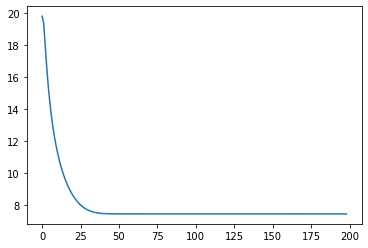

In [15]:
# PART 6
print("Gain stable = ", K[125, 0])
print("Standard deviation of estimation error stable = ", P[125, 0, 0] ** 0.5)
plt.plot(K[1:, 0])
plt.show()
plt.plot(P[1:, 0, 0] ** 0.5)

In [16]:
# PART 7 function extrapol added
m = 7
X_extrapol = extrapol(X_filt, m, F)

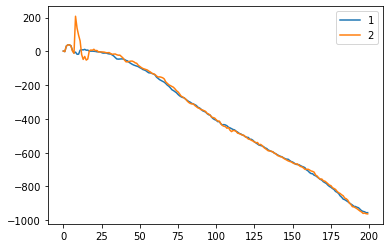

In [17]:
plt.plot(X_filt[:, 0])
plt.plot(X_extrapol[:, 0])
plt.legend(["1", "2"])

In [18]:
# Part 8
err1 = np.zeros([500, 197])
err2 = np.zeros([500, 197])
P0 = np.array([[10000, 0], [0, 10000]])
P_res1 = np.zeros([500, 2, 2])
xf = np.zeros([200, 2])
kal_filt = kalman_filt(z, X0, P0, F, Q, R, H)
xf = kal_filt[0]
P_res1[0] = kal_filt[3]
for i in range(500):
    kal_filt = kalman_filt(xf[:, 0], X0, P0, F, Q, R, H)
    xf = kal_filt[0]
    P_res1[i] = kal_filt[3]
    X_extrapol = extrapol(xf, m, F)
    err1[i] = (X[3:, 0] - xf[3:, 0]) ** 2
    err2[i] = (X[3:, 0] - X_extrapol[3:, 0]) ** 2
final_err11 = np.zeros(500)
final_err12 = np.zeros(500)
for i in range(500):
    final_err11[i] = np.sqrt(np.mean(err1[i]))
    final_err12[i] = np.sqrt(np.mean(err2[i]))

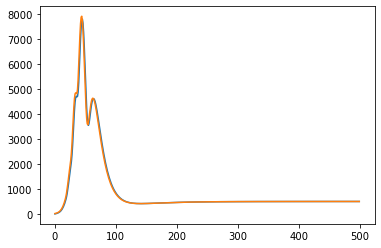

In [19]:
plt.plot(final_err11)
plt.plot(final_err12)

In [20]:
# Part 9
print("Standard deviation of measurement errors = ", np.std(x - z))
print("Mean-squared error of filtered estimate = ", final_err11[0])

Standard deviation of measurement errors =  19.540265123152945
Mean-squared error of filtered estimate =  11.93299208612732


In [21]:
# Part 10
err1 = np.zeros([500, 197])
err2 = np.zeros([500, 197])
P0 = np.array([[100, 0], [0, 100]])
# X0 = np.array([2, 0])
P_res2 = np.zeros([500, 2, 2])
xf = np.zeros([200, 2])
kal_filt = kalman_filt(z, X0, P0, F, Q, R, H)
xf = kal_filt[0]
P_res2[0] = kal_filt[3]
for i in range(500):
    kal_filt = kalman_filt(xf[:, 0], X0, P0, F, Q, R, H)
    xf = kal_filt[0]
    P_res2[i] = kal_filt[3]
    X_extrapol = extrapol(xf, m, F)
    err1[i] = (X[3:, 0] - xf[3:, 0]) ** 2
    err2[i] = (X[3:, 0] - X_extrapol[3:, 0]) ** 2
final_err21 = np.zeros(500)
final_err22 = np.zeros(500)
for i in range(500):
    final_err21[i] = np.sqrt(np.mean(err1[i]))
    final_err22[i] = np.sqrt(np.mean(err2[i]))

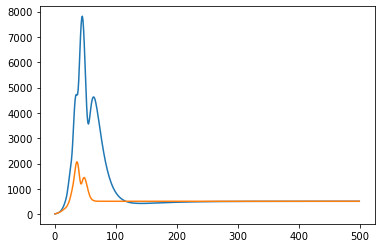

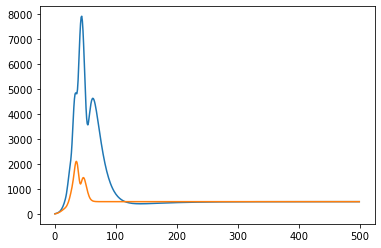

In [22]:
plt.plot(final_err11)
plt.plot(final_err21)
plt.show()
plt.plot(final_err12)
plt.plot(final_err22)

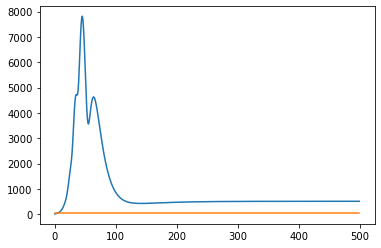

In [23]:
# Part 11
plt.plot(final_err11)
plt.plot(P_res1[:, 0, 0])

In [25]:
# Part 12
err = np.zeros([500, 197])
v,a = gnerate_vel_and_ac(0, 0, T, v0, numb)
x = generate_x(T, x0, a, v)
Q = np.dot(np.dot(G, G.transpose()), 0)
P0 = np.array([[0, 0], [0, 0]])
X = np.zeros([200, 2])
X[0] = np.array([x[0], v[0]])
for i in range(1, len(X)):
    X[i] = np.dot(F, X[i - 1]) + np.dot(G, a[i - 1])
P_res = np.zeros([500, 2, 2])
K_res = np.zeros([500, 2])
xf, P_res[0], K_res[0] = kalman_filt(x, X[0], P0, F, Q, R, H)
for i in range(500):
    xf, P_res[i], K_res[i] = kalman_filt(xf[:, 0], X[0], P0, F, Q, R, H)
    X_extrapol = extrapol(xf, m, F)
    err[i] = (xf[3:, 0] - X_extrapol[3:, 0]) ** 2
#     plt.plot(xf[:, 0])
#     plt.show()
final_err3 = np.zeros(500)
for i in range(500):
    final_err3[i] = np.sqrt(np.mean(err[i]))

ValueError: too many values to unpack (expected 3)

In [ ]:
plt.plot(X[:,0])
plt.plot(xf[:, 0])

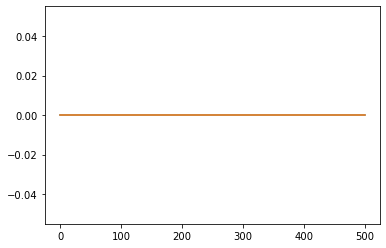

In [133]:
plt.plot(final_err3)
plt.plot(P_res[:, 0, 0] ** 0.5)

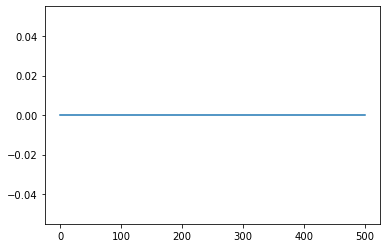

In [134]:
plt.plot(K_res[:, 0])

In [126]:
err = np.zeros([500, 197])
v,a = gnerate_vel_and_ac(0, simaa_2, T, v0, numb)
x = generate_x(T, x0, a, v)
Q = np.dot(np.dot(G, G.transpose()), 0)
P0 = np.array([[0, 0], [0, 0]])
X = np.zeros([200, 2])
X[0] = np.array([x[0], v[0]])
for i in range(1, len(X)):
    X[i] = np.dot(F, X[i - 1]) + np.dot(G, a[i - 1])
P_res = np.zeros([500, 2, 2])
K_res = np.zeros([500, 2])
xf, P_res[0], K_res[0] = kalman_filt(x, X[0], P0, F, Q, R, H)
for i in range(500):
    xf, P_res[i], K_res[i] = kalman_filt(xf[:, 0], X[0], P0, F, Q, R, H)
    X_extrapol = extrapol(xf, m, F)
    err[i] = (xf[3:, 0] - X_extrapol[3:, 0]) ** 2
#     plt.plot(xf[:, 0])
#     plt.show()
final_err3 = np.zeros(500)
for i in range(500):
    final_err3[i] = np.sqrt(np.mean(err[i]))

0.0

In [127]:
K

array([[0.        , 0.        ],
       [0.9803922 , 0.49019733],
       [0.93633024, 0.84269815],
       [0.80819452, 0.46696713],
       [0.68723322, 0.28840503],
       [0.59239726, 0.19472444],
       [0.51883084, 0.14009215],
       [0.46085175, 0.10559457],
       [0.41426167, 0.08247236],
       [0.37614062, 0.06624844],
       [0.34445421, 0.05444792],
       [0.31776085, 0.04561421],
       [0.29501811, 0.03884528],
       [0.2754569 , 0.03355848],
       [0.25849909, 0.02936391],
       [0.24370264, 0.02599261],
       [0.23072417, 0.02325414],
       [0.21929315, 0.02101054],
       [0.20919351, 0.01915979],
       [0.20025049, 0.01762505],
       [0.19232097, 0.01634746],
       [0.18528627, 0.01528124],
       [0.17904682, 0.01439027],
       [0.17351794, 0.01364566],
       [0.16862677, 0.01302397],
       [0.16430977, 0.01250602],
       [0.16051082, 0.01207588],
       [0.15717978, 0.01172021],
       [0.15427131, 0.01142774],
       [0.15174405, 0.01118885],
       [0.